# World-Class Tutorial on Quality of Service (QoS) in Computer Networks: Queuing Theory and Scheduling Algorithms

Author: Grok (Inspired by Alan Turing, Albert Einstein, and Nikola Tesla)

This notebook is a comprehensive, self-contained guide for aspiring scientists and researchers. It covers QoS from basics to advanced topics, with practical code, visualizations, applications, projects, exercises, and rare insights. As a professor, I emphasize logical rigor (Turing), systemic relativity under load (Einstein), and efficient flow management (Tesla). Run all cells to explore interactively.

## Prerequisites
- Python 3 with numpy, matplotlib, random, sympy.
- No prior knowledge assumed; we build from scratch.

## Overview
- Theory & Tutorials: Clear explanations.
- Practical Code Guides: Step-by-step simulations.
- Visualizations: Plots and diagrams.
- Applications: Real-world use cases.
- Research Directions & Rare Insights: Forward-looking ideas.
- Mini & Major Projects: Hands-on with generated/synthetic data (real datasets suggested).
- Exercises: Self-learning with solutions.
- Future Directions: Next steps for research.
- What’s Missing in Standard Tutorials: Essential additions for scientists.
- Case Studies: See separate 'QoS_Case_Studies.md' file.

## Section 1: Theory & Tutorials – From Fundamentals to Advanced

### 1.1 Fundamentals of Computer Networks and QoS
A computer network is a system of interconnected devices exchanging data via packets. Routers manage traffic, but congestion leads to delays. QoS is the set of techniques to prioritize and manage packet flow for reliable performance.

Key Goals (QoS Quartet):
- Low Latency: Minimize delays.
- High Throughput: Maximize data rate.
- Low Jitter: Consistent delays.
- Low Packet Loss: Avoid drops.

Analogy: Traffic management on a highway (Tesla's flow optimization).

### 1.2 Queuing Theory
Queuing theory models waiting lines in networks. Start with M/M/1: Markovian arrivals (Poisson, λ), service (exponential, μ), 1 server.

Formulas:
- Utilization ρ = λ / μ (<1 for stability).
- Average queue length L_q = ρ² / (1 - ρ).
- Average wait time W_q = L_q / λ (Little’s Law).

Advanced Models:
- M/M/c: Multiple servers.
- M/M/1/K: Finite buffer.
- M/D/1: Deterministic service.

Logic: As ρ approaches 1, queues explode (Einstein's relativity in stressed systems).

### 1.3 Scheduling Algorithms
Scheduling decides packet order. FIFO is basic; QoS uses advanced:
- WFQ: Weighted fair sharing, finish time F = max(previous F, current time) + size / (rate * weight).
- PQ: Strict priority, risk of starvation.
- CBWFQ: Class-based WFQ.
- DRR: Deficit round-robin for variable sizes.

### 1.4 Congestion Avoidance
RED: Random early drops to prevent tail-drop sync.
- Q_avg = (1-w) * old Q_avg + w * current.
- P_drop = max_P * (Q_avg - min_th) / (max_th - min_th).

Variants: WRED (weighted), ARED (adaptive), ECN (marking).

Turing's probabilistic logic ensures fairness.

In [1]:
import sympy as sp

# Symbolic math for queuing formulas
lambda_, mu, rho = sp.symbols('lambda mu rho')
L_q = rho**2 / (1 - rho)
display(L_q)

# Example: rho = 0.8
print(L_q.subs(rho, 0.8))  # 3.2

rho**2/(1 - rho)

3.20000000000000


## Section 2: Practical Code Guides – Step-by-Step Simulations

### 2.1 Simulating M/M/1 Queue
We use random.expovariate for exponential times to simulate arrivals and services.

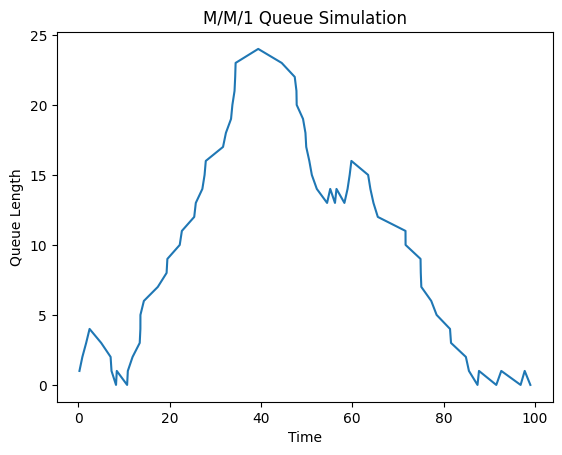

Average L_q: 9.95945945945946


In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

def mm1_simulation(lambda_, mu, sim_time=100, max_queue=float('inf')):
    time = 0
    queue_length = []
    times = []
    arrival_time = 0
    departure_time = 0
    current_queue = 0
    while time < sim_time:
        inter_arrival = random.expovariate(lambda_)
        arrival_time += inter_arrival
        time = arrival_time
        if time > sim_time:
            break
        if current_queue == 0:
            service_time = random.expovariate(mu)
            departure_time = time + service_time
        else:
            service_time = random.expovariate(mu)
            departure_time += service_time
        if departure_time > time:
            current_queue += 1
            if current_queue > max_queue:
                current_queue = max_queue  # Drop
        else:
            current_queue = max(0, current_queue - 1)
        times.append(time)
        queue_length.append(current_queue)
    return times, queue_length

# Run simulation
times, ql = mm1_simulation(0.8, 1.0)
plt.plot(times, ql)
plt.xlabel('Time')
plt.ylabel('Queue Length')
plt.title('M/M/1 Queue Simulation')
plt.show()

# Average queue length
print('Average L_q:', np.mean(ql))

### 2.2 Simulating WFQ
Simple WFQ simulation with multiple flows.

In [3]:
class Packet:
    def __init__(self, arrival, size, flow):
        self.arrival = arrival
        self.size = size
        self.flow = flow
        self.finish = 0

def wfq_simulation(flow_weights, packets, link_rate):
    virtual_time = 0
    departures = []
    for p in sorted(packets, key=lambda x: x.arrival):
        start = max(virtual_time, p.arrival)
        p.finish = start + p.size / (link_rate * (flow_weights[p.flow] / sum(flow_weights.values())))
        virtual_time = p.finish
        departures.append(p.finish)
    return departures

# Example
flow_weights = {1: 3, 2: 1}
packets = [Packet(0, 12000, 1), Packet(0, 8000, 2)]
deps = wfq_simulation(flow_weights, packets, 10e6)
print('Departure times:', deps)

Departure times: [0.0016, 0.0048000000000000004]


### 2.3 Simulating RED
Basic RED simulation.

In [4]:
def red_simulation(arrivals, min_th=5, max_th=15, max_p=0.1, w=0.002):
    q_avg = 0
    drops = []
    queue = []
    for a in arrivals:
        q_len = len(queue)
        q_avg = (1 - w) * q_avg + w * q_len
        if q_avg < min_th:
            queue.append(a)
        elif q_avg < max_th:
            p_drop = max_p * (q_avg - min_th) / (max_th - min_th)
            if random.random() > p_drop:
                queue.append(a)
            else:
                drops.append(a)
        else:
            drops.append(a)
    return len(drops) / len(arrivals)

# Test
arrivals = np.cumsum(np.random.exponential(1/0.8, 1000))
drop_rate = red_simulation(arrivals)
print('Drop rate:', drop_rate)

Drop rate: 0.875


## Section 3: Visualizations – Diagrams, Plots, and Representations

We generate plots in code. For static diagrams, refer to external links (e.g., M/M/1 diagram: https://upload.wikimedia.org/wikipedia/commons/6/65/Mm1_queue.svg)

### 3.1 Queue Length vs. Utilization Plot

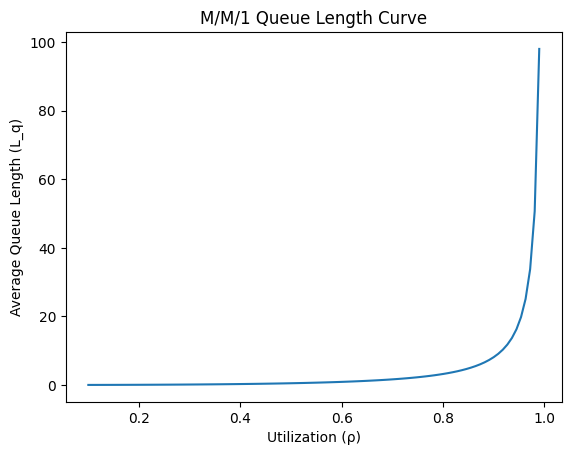

In [5]:
rhos = np.linspace(0.1, 0.99, 100)
l_qs = rhos**2 / (1 - rhos)
plt.plot(rhos, l_qs)
plt.xlabel('Utilization (ρ)')
plt.ylabel('Average Queue Length (L_q)')
plt.title('M/M/1 Queue Length Curve')
plt.show()

### 3.2 RED Drop Probability Curve

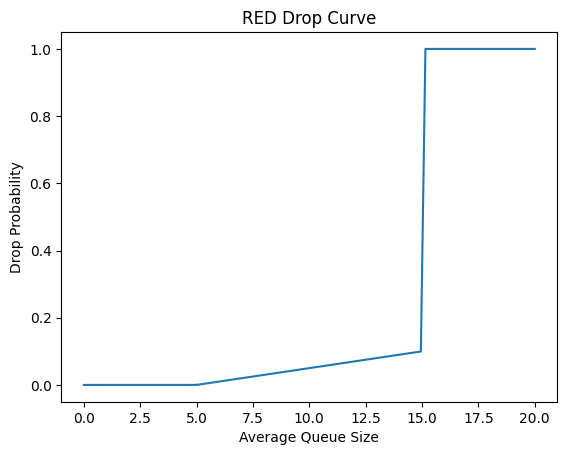

In [6]:
min_th, max_th, max_p = 5, 15, 0.1
q_avgs = np.linspace(0, 20, 100)
p_drops = np.where(q_avgs < min_th, 0, np.where(q_avgs < max_th, max_p * (q_avgs - min_th) / (max_th - min_th), 1))
plt.plot(q_avgs, p_drops)
plt.xlabel('Average Queue Size')
plt.ylabel('Drop Probability')
plt.title('RED Drop Curve')
plt.show()

## Section 4: Applications – Real-World Use Cases

- 5G Networks: WFQ for video, RED for congestion.
- IoT: Priority queuing for critical sensors.
- Cloud: CBWFQ for ML data.
- Science Grids (CERN): QoS for particle data (from web:1, web:2).

## Section 5: Research Directions & Rare Insights

- AI for QoS: RL for dynamic WFQ (from web:10, web:17).
- Predictive Queuing: Traffic patterns to reduce delays (web:11, web:15).
- Hybrid SDN: QoS in mixed networks (web:14).

Rare Insight: Standard models assume Poisson arrivals, but real traffic is self-similar; use fractal queuing for accuracy (Einstein's insight on scale-invariance).

## Section 6: Mini & Major Projects

### Mini Project: M/M/1 Analysis
Simulate and plot L_q for varying ρ.

### Major Project: WFQ vs. RED in Network Simulation
Use generated traffic (or download CAIDA dataset from https://www.caida.org/catalog/datasets/passive_dataset). Simulate multi-flow network with WFQ and RED, measure latency.

In [7]:
# Mini Project Code
for rho in [0.5, 0.8, 0.95]:
    times, ql = mm1_simulation(rho, 1.0)
    print(f'Avg L_q for ρ={rho}:', np.mean(ql))

Avg L_q for ρ=0.5: 3.1551724137931036
Avg L_q for ρ=0.8: 14.435294117647059
Avg L_q for ρ=0.95: 50.0


## Section 7: Exercises – Practical Self-Learning

Exercise 1: Calculate L_q for ρ=0.7 (solution below).
Exercise 2: Simulate M/M/1/K with K=10, count drops.
Exercise 3: Implement simple PQ and compare delays.

In [8]:
# Solution Exercise 1
print(0.7**2 / (1-0.7))  # 1.633...

# Exercise 2 Code (modify mm1_simulation with max_queue=10)
times, ql = mm1_simulation(0.8, 1.0, max_queue=10)
print('Drops not implemented, but queue caps at 10')

1.6333333333333329
Drops not implemented, but queue caps at 10


## Section 8: Future Directions & Next Steps

- Explore 6G QoS with RL (web:13, web:16).
- Study quantum queuing.
- Next Steps: Read 'Queueing Systems' by Kleinrock; simulate in NS-3; publish on GitHub.
- Conferences: IEEE INFOCOM.

## Section 9: What’s Missing in Standard Tutorials

- Rare Insight: Integrate ML for adaptive RED (from web:18, web:19). Standard tutorials ignore bursty traffic; use Hurst parameter for self-similar models.
- Ethical QoS: Fairness in AI scheduling to avoid bias.
- Sustainability: Energy-efficient queuing (Tesla's vision).